In [2]:
import numpy as np
import pandas as pd

In [4]:
df_consolidated = pd.read_csv('consolidated_v3.csv')
df_one_way = pd.read_csv('one_way_v3.csv')
df_one_way = df_one_way[pd.notnull(df_one_way['Unnamed: 3'])]
rows = df_consolidated['Unnamed: 0'].values
columns = df_consolidated.columns.values
rows_lst = list(map(lambda x: x.rstrip(), list(rows)))
columns_lst = list(map(lambda x: x.rstrip(), list(columns)))

columns_lst.remove('Unnamed: 0')
columns = np.array(columns_lst)
rows = np.array(rows_lst)

In [5]:
from_streets = list(df_one_way['FROM'].values)
from_streets = list(map(lambda x: x.rstrip(), from_streets))
to_streets = list(df_one_way['TO'].values)
to_streets = list(map(lambda x: x.rstrip(), to_streets))
one_way = list(df_one_way['TWO WAY?'].values)
values = list(df_one_way['Unnamed: 3'])
traffic_matrix = np.zeros((len(rows_lst), len(columns_lst)))
for from_st, to_st, one_way, value in zip(from_streets, to_streets, one_way, values):
#     print(value)
    row_index = rows_lst.index(from_st)
    column_index = columns_lst.index(to_st)
#     print(from_st, to_st)
    if one_way == 'NO':
        traffic_matrix[row_index][column_index] = value
    else:
        traffic_matrix[row_index][column_index] = value / 2
        traffic_matrix[column_index][row_index] = value / 2
        
print(traffic_matrix)

In [6]:
# convert to DTMC
def convert_to_DTMC(matrix):
    matrix = matrix.copy()
    row_sum = np.sum(matrix, axis=1)
    maximum_value = max(row_sum)
    result = matrix / maximum_value
    
    row_sum_DTMC = np.sum(result, axis=1)
    for i in range(len(row_sum)):
        result[i][i] = 1 - row_sum_DTMC[i]
    return result

test_matrix = np.array([[0, 1, 0], [2.5, 0, 2.5], [3, 0, 0]])
DTMC_matrix = convert_to_DTMC(test_matrix)
print(DTMC_matrix)
   
traffic_matrix_DTMC = convert_to_DTMC(traffic_matrix)
print(traffic_matrix_DTMC.shape)

[[ 0.8  0.2  0. ]
 [ 0.5  0.   0.5]
 [ 0.6  0.   0.4]]
(94, 94)


In [ ]:
# print(np.sum(traffic_matrix_DTMC, axis=1))
# print(traffic_matrix_DTMC)
average_counts = {}
for i in range(traffic_matrix_DTMC.shape[0]):
    average_counts[i] = []
for trial in range(20):
    counts = {}
    for i in range(traffic_matrix_DTMC.shape[0]):
        counts[i] = 0
    # print(traffic_matrix_DTMC)
    num_iters = 1000000
    current = np.random.randint(94)
    print('Starting point: {0}'.format(rows_lst[current]))
    for _ in range(num_iters):

        row_indices, col_indices = np.nonzero(traffic_matrix_DTMC)
        arg_row = np.where(row_indices == current)[0]
        col_choices = col_indices[arg_row]
        current = np.random.choice(col_choices, p=traffic_matrix_DTMC[current][col_choices])
        counts[current] += 1
        if (_ % 10000 == 0):
            print('Trial', trial, 'Iteration', _)
    print(counts)
    total = sum(counts.values())
    for k in counts:
        counts[k] = counts[k] / total
    for k in counts: 
        average_counts[k].append(counts[k])

    
    

Starting point: SAN PABLO/UNIVERSITY
Trial 0 Iteration 0
Trial 0 Iteration 10000
Trial 0 Iteration 20000
Trial 0 Iteration 30000
Trial 0 Iteration 40000
Trial 0 Iteration 50000
Trial 0 Iteration 60000
Trial 0 Iteration 70000
Trial 0 Iteration 80000
Trial 0 Iteration 90000
Trial 0 Iteration 100000
Trial 0 Iteration 110000
Trial 0 Iteration 120000
Trial 0 Iteration 130000
Trial 0 Iteration 140000
Trial 0 Iteration 150000
Trial 0 Iteration 160000
Trial 0 Iteration 170000
Trial 0 Iteration 180000
Trial 0 Iteration 190000
Trial 0 Iteration 200000
Trial 0 Iteration 210000
Trial 0 Iteration 220000
Trial 0 Iteration 230000
Trial 0 Iteration 240000
Trial 0 Iteration 250000
Trial 0 Iteration 260000
Trial 0 Iteration 270000
Trial 0 Iteration 280000
Trial 0 Iteration 290000
Trial 0 Iteration 300000
Trial 0 Iteration 310000
Trial 0 Iteration 320000
Trial 0 Iteration 330000
Trial 0 Iteration 340000
Trial 0 Iteration 350000
Trial 0 Iteration 360000
Trial 0 Iteration 370000
Trial 0 Iteration 380000
Tr

Trial 2 Iteration 500000
Trial 2 Iteration 510000
Trial 2 Iteration 520000
Trial 2 Iteration 530000
Trial 2 Iteration 540000
Trial 2 Iteration 550000
Trial 2 Iteration 560000
Trial 2 Iteration 570000
Trial 2 Iteration 580000
Trial 2 Iteration 590000
Trial 2 Iteration 600000
Trial 2 Iteration 610000
Trial 2 Iteration 620000
Trial 2 Iteration 630000
Trial 2 Iteration 640000
Trial 2 Iteration 650000
Trial 2 Iteration 660000
Trial 2 Iteration 670000
Trial 2 Iteration 680000
Trial 2 Iteration 690000
Trial 2 Iteration 700000
Trial 2 Iteration 710000
Trial 2 Iteration 720000
Trial 2 Iteration 730000
Trial 2 Iteration 740000
Trial 2 Iteration 750000
Trial 2 Iteration 760000
Trial 2 Iteration 770000
Trial 2 Iteration 780000
Trial 2 Iteration 790000
Trial 2 Iteration 800000
Trial 2 Iteration 810000
Trial 2 Iteration 820000
Trial 2 Iteration 830000
Trial 2 Iteration 840000
Trial 2 Iteration 850000
Trial 2 Iteration 860000
Trial 2 Iteration 870000
Trial 2 Iteration 880000
Trial 2 Iteration 890000


Trial 5 Iteration 10000
Trial 5 Iteration 20000
Trial 5 Iteration 30000
Trial 5 Iteration 40000
Trial 5 Iteration 50000
Trial 5 Iteration 60000
Trial 5 Iteration 70000
Trial 5 Iteration 80000
Trial 5 Iteration 90000
Trial 5 Iteration 100000
Trial 5 Iteration 110000
Trial 5 Iteration 120000
Trial 5 Iteration 130000
Trial 5 Iteration 140000
Trial 5 Iteration 150000
Trial 5 Iteration 160000
Trial 5 Iteration 170000
Trial 5 Iteration 180000
Trial 5 Iteration 190000
Trial 5 Iteration 200000
Trial 5 Iteration 210000
Trial 5 Iteration 220000
Trial 5 Iteration 230000
Trial 5 Iteration 240000
Trial 5 Iteration 250000
Trial 5 Iteration 260000
Trial 5 Iteration 270000
Trial 5 Iteration 280000
Trial 5 Iteration 290000
Trial 5 Iteration 300000
Trial 5 Iteration 310000
Trial 5 Iteration 320000
Trial 5 Iteration 330000
Trial 5 Iteration 340000
Trial 5 Iteration 350000
Trial 5 Iteration 360000
Trial 5 Iteration 370000
Trial 5 Iteration 380000
Trial 5 Iteration 390000
Trial 5 Iteration 400000
Trial 5 I

Trial 7 Iteration 520000
Trial 7 Iteration 530000
Trial 7 Iteration 540000
Trial 7 Iteration 550000
Trial 7 Iteration 560000
Trial 7 Iteration 570000
Trial 7 Iteration 580000
Trial 7 Iteration 590000
Trial 7 Iteration 600000
Trial 7 Iteration 610000
Trial 7 Iteration 620000
Trial 7 Iteration 630000
Trial 7 Iteration 640000
Trial 7 Iteration 650000
Trial 7 Iteration 660000
Trial 7 Iteration 670000
Trial 7 Iteration 680000
Trial 7 Iteration 690000
Trial 7 Iteration 700000
Trial 7 Iteration 710000
Trial 7 Iteration 720000
Trial 7 Iteration 730000
Trial 7 Iteration 740000
Trial 7 Iteration 750000
Trial 7 Iteration 760000
Trial 7 Iteration 770000
Trial 7 Iteration 780000
Trial 7 Iteration 790000
Trial 7 Iteration 800000
Trial 7 Iteration 810000
Trial 7 Iteration 820000
Trial 7 Iteration 830000
Trial 7 Iteration 840000
Trial 7 Iteration 850000
Trial 7 Iteration 860000
Trial 7 Iteration 870000
Trial 7 Iteration 880000
Trial 7 Iteration 890000
Trial 7 Iteration 900000
Trial 7 Iteration 910000


Trial 10 Iteration 10000
Trial 10 Iteration 20000
Trial 10 Iteration 30000
Trial 10 Iteration 40000
Trial 10 Iteration 50000
Trial 10 Iteration 60000
Trial 10 Iteration 70000
Trial 10 Iteration 80000
Trial 10 Iteration 90000
Trial 10 Iteration 100000
Trial 10 Iteration 110000
Trial 10 Iteration 120000
Trial 10 Iteration 130000
Trial 10 Iteration 140000
Trial 10 Iteration 150000
Trial 10 Iteration 160000
Trial 10 Iteration 170000
Trial 10 Iteration 180000
Trial 10 Iteration 190000
Trial 10 Iteration 200000
Trial 10 Iteration 210000
Trial 10 Iteration 220000
Trial 10 Iteration 230000
Trial 10 Iteration 240000
Trial 10 Iteration 250000
Trial 10 Iteration 260000
Trial 10 Iteration 270000
Trial 10 Iteration 280000
Trial 10 Iteration 290000
Trial 10 Iteration 300000
Trial 10 Iteration 310000
Trial 10 Iteration 320000
Trial 10 Iteration 330000
Trial 10 Iteration 340000
Trial 10 Iteration 350000
Trial 10 Iteration 360000
Trial 10 Iteration 370000
Trial 10 Iteration 380000
Trial 10 Iteration 39

Trial 12 Iteration 430000
Trial 12 Iteration 440000
Trial 12 Iteration 450000
Trial 12 Iteration 460000
Trial 12 Iteration 470000
Trial 12 Iteration 480000
Trial 12 Iteration 490000
Trial 12 Iteration 500000
Trial 12 Iteration 510000
Trial 12 Iteration 520000
Trial 12 Iteration 530000
Trial 12 Iteration 540000
Trial 12 Iteration 550000
Trial 12 Iteration 560000
Trial 12 Iteration 570000
Trial 12 Iteration 580000
Trial 12 Iteration 590000
Trial 12 Iteration 600000
Trial 12 Iteration 610000
Trial 12 Iteration 620000
Trial 12 Iteration 630000
Trial 12 Iteration 640000
Trial 12 Iteration 650000
Trial 12 Iteration 660000
Trial 12 Iteration 670000
Trial 12 Iteration 680000
Trial 12 Iteration 690000
Trial 12 Iteration 700000
Trial 12 Iteration 710000
Trial 12 Iteration 720000
Trial 12 Iteration 730000
Trial 12 Iteration 740000
Trial 12 Iteration 750000
Trial 12 Iteration 760000
Trial 12 Iteration 770000
Trial 12 Iteration 780000
Trial 12 Iteration 790000
Trial 12 Iteration 800000
Trial 12 Ite

Trial 14 Iteration 840000
Trial 14 Iteration 850000
Trial 14 Iteration 860000
Trial 14 Iteration 870000
Trial 14 Iteration 880000
Trial 14 Iteration 890000
Trial 14 Iteration 900000
Trial 14 Iteration 910000
Trial 14 Iteration 920000
Trial 14 Iteration 930000
Trial 14 Iteration 940000
Trial 14 Iteration 950000
Trial 14 Iteration 960000
Trial 14 Iteration 970000
Trial 14 Iteration 980000
Trial 14 Iteration 990000
{0: 9224, 1: 9316, 2: 7699, 3: 9057, 4: 8927, 5: 8801, 6: 8359, 7: 9635, 8: 8399, 9: 9002, 10: 9248, 11: 9316, 12: 8940, 13: 10045, 14: 9928, 15: 10162, 16: 8947, 17: 9643, 18: 8448, 19: 9298, 20: 11259, 21: 9701, 22: 10741, 23: 10521, 24: 8630, 25: 8938, 26: 9483, 27: 9600, 28: 10064, 29: 10333, 30: 10609, 31: 7637, 32: 8913, 33: 9781, 34: 9945, 35: 9939, 36: 10360, 37: 10632, 38: 12127, 39: 5504, 40: 8115, 41: 36008, 42: 31381, 43: 28096, 44: 25165, 45: 10468, 46: 9629, 47: 24402, 48: 10172, 49: 9638, 50: 7247, 51: 8834, 52: 8147, 53: 9509, 54: 25956, 55: 9028, 56: 9034, 57: 

In [269]:
# print(sum(counts.values()))
average_over_trials = {}
for k in average_counts:
    average_over_trials[k] = sum(average_counts[k]) / len(average_counts[k])
dictionary_graph = {}
for k in average_over_trials:
    dictionary_graph[rows_lst[k]] = average_over_trials[k]
dist_array = np.array([average_over_trials[i] for i in range(len(average_over_trials))])
top_5_indices = np.argpartition(dist_array, -5)[-5:]
top_5_streets = np.array(rows_lst)[top_5_indices]
top_5_values = dist_array[top_5_indices]
print(top_5_streets)
print(top_5_values)

['MILVIA/ROSE' 'BANCROFT/SHATTUCK' 'HOPKINS/MILVIA' 'BANCROFT/OXFORD'
 'BANCROFT/TELEGRAPH']
[0.022717  0.0273385 0.0229966 0.031858  0.0357272]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))  # width:20, height:3
plt.bar(range(len(dictionary_graph)), dictionary_graph.values(), align='edge', width=0.4)
plt.xticks(range(len(dictionary_graph)), list(dictionary_graph.keys()), rotation='vertical')
plt.savefig("Intersection Perspective Results.jpg")
plt.show()

NameError: name 'dictionary_graph' is not defined

In [10]:
row_ind, column_ind = np.nonzero(traffic_matrix)
list_row_indices = [elem for elem in zip(row_ind, column_ind)]
def find_indices(tuple_street, list_row_indices):
    lst = []
    for idx, elem in enumerate(list_row_indices):
        if tuple_street[1] == elem[0]:
            lst.append(idx)
    return lst

new_traffic_matrix = np.zeros((len(list_row_indices), len(list_row_indices)))
for i, row in enumerate(list_row_indices):
    col_indices = find_indices(list_row_indices[i], list_row_indices)
    new_traffic_matrix[i][col_indices] = traffic_matrix[row[0]][row[1]] / len(col_indices)

In [11]:
new_traffic_matrix_DTMC = convert_to_DTMC(new_traffic_matrix)
# print(rows_lst)
# print(list_row_indices)
list_street_sections = []
for elem in list_row_indices:
    list_street_sections.append(rows_lst[elem[0]] + '--' + rows_lst[elem[1]])
# print(list_street_sections)
global list_street_sections
def simulate_pagrank_inverted(traffic_matrix_DTMC):  
    counts = {}
    for i in range(traffic_matrix_DTMC.shape[0]):
        counts[i] = 0
    # print(traffic_matrix_DTMC)
    num_iters = 100000
    current = np.random.randint(traffic_matrix_DTMC.shape[0])
    print('Starting point: {0}'.format(list_street_sections[current]))
    for _ in range(num_iters):

        row_indices, col_indices = np.nonzero(traffic_matrix_DTMC)
        arg_row = np.where(row_indices == current)[0]
        col_choices = col_indices[arg_row]
        current = np.random.choice(col_choices, p=traffic_matrix_DTMC[current][col_choices])
        counts[current] += 1
        if (_ % 10000 == 0):
            print(_)
    print(counts)
    total = sum(counts.values())
    for k in counts:
        counts[k] = counts[k] / total
    print(counts)
    return counts
average_distribution_inverted = {}
for i in range(new_traffic_matrix_DTMC.shape[0]):
    average_distribution_inverted[i] = []

for trial in range(10):
    print('Trial', trial)
    distribution = simulate_pagrank_inverted(new_traffic_matrix_DTMC)
    for k in distribution:
        average_distribution_inverted[k].append(distribution[k])
average_trials_inverted = {}
for k in average_distribution_inverted:
    average_trials_inverted[k] = sum(average_distribution_inverted[k]) / len(average_distribution_inverted[k])
print(average_distribution_inverted)

Trial 0
Starting point: ASHBY/COLLEGE--BANCROFT/COLLEGE
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
{0: 13, 1: 146, 2: 244, 3: 532, 4: 884, 5: 750, 6: 13, 7: 15, 8: 236, 9: 15, 10: 128, 11: 173, 12: 391, 13: 245, 14: 193, 15: 593, 16: 1033, 17: 863, 18: 364, 19: 456, 20: 487, 21: 1468, 22: 519, 23: 511, 24: 545, 25: 527, 26: 404, 27: 185, 28: 576, 29: 398, 30: 611, 31: 317, 32: 483, 33: 554, 34: 105, 35: 561, 36: 1104, 37: 616, 38: 471, 39: 447, 40: 453, 41: 481, 42: 386, 43: 751, 44: 425, 45: 443, 46: 182, 47: 440, 48: 274, 49: 300, 50: 662, 51: 154, 52: 403, 53: 427, 54: 119, 55: 209, 56: 490, 57: 424, 58: 362, 59: 726, 60: 279, 61: 263, 62: 139, 63: 128, 64: 355, 65: 282, 66: 206, 67: 113, 68: 154, 69: 51, 70: 271, 71: 119, 72: 23, 73: 23, 74: 199, 75: 26, 76: 100, 77: 74, 78: 64, 79: 169, 80: 197, 81: 449, 82: 150, 83: 95, 84: 179, 85: 54, 86: 104, 87: 77, 88: 231, 89: 220, 90: 32, 91: 264, 92: 226, 93: 84, 94: 101, 95: 80, 96: 88, 97: 74, 98: 61, 99: 169, 100: 42, 101:

10000
20000
30000
40000
50000
60000
70000
80000
90000
{0: 18, 1: 362, 2: 865, 3: 910, 4: 662, 5: 371, 6: 20, 7: 15, 8: 210, 9: 12, 10: 115, 11: 253, 12: 995, 13: 299, 14: 960, 15: 823, 16: 868, 17: 1090, 18: 679, 19: 481, 20: 332, 21: 543, 22: 635, 23: 1131, 24: 275, 25: 811, 26: 483, 27: 202, 28: 854, 29: 607, 30: 645, 31: 1295, 32: 555, 33: 320, 34: 255, 35: 459, 36: 207, 37: 216, 38: 256, 39: 387, 40: 529, 41: 176, 42: 233, 43: 829, 44: 308, 45: 108, 46: 222, 47: 484, 48: 188, 49: 233, 50: 535, 51: 206, 52: 342, 53: 895, 54: 163, 55: 274, 56: 221, 57: 260, 58: 364, 59: 651, 60: 283, 61: 170, 62: 131, 63: 79, 64: 381, 65: 232, 66: 166, 67: 155, 68: 249, 69: 86, 70: 155, 71: 139, 72: 67, 73: 103, 74: 89, 75: 110, 76: 125, 77: 141, 78: 140, 79: 39, 80: 121, 81: 157, 82: 51, 83: 51, 84: 82, 85: 95, 86: 24, 87: 148, 88: 50, 89: 244, 90: 212, 91: 105, 92: 99, 93: 106, 94: 105, 95: 111, 96: 59, 97: 89, 98: 76, 99: 169, 100: 246, 101: 224, 102: 86, 103: 184, 104: 208, 105: 291, 106: 252, 10

10000
20000
30000
40000
50000
60000
70000
80000
90000
{0: 14, 1: 147, 2: 717, 3: 325, 4: 363, 5: 583, 6: 16, 7: 7, 8: 351, 9: 8, 10: 85, 11: 94, 12: 844, 13: 226, 14: 513, 15: 651, 16: 565, 17: 248, 18: 471, 19: 606, 20: 1238, 21: 538, 22: 898, 23: 527, 24: 1016, 25: 462, 26: 471, 27: 142, 28: 452, 29: 443, 30: 332, 31: 512, 32: 503, 33: 358, 34: 669, 35: 279, 36: 761, 37: 341, 38: 532, 39: 658, 40: 661, 41: 422, 42: 261, 43: 1143, 44: 345, 45: 510, 46: 130, 47: 579, 48: 259, 49: 230, 50: 314, 51: 123, 52: 446, 53: 471, 54: 155, 55: 268, 56: 236, 57: 656, 58: 429, 59: 1034, 60: 222, 61: 268, 62: 192, 63: 199, 64: 269, 65: 652, 66: 185, 67: 96, 68: 324, 69: 278, 70: 319, 71: 207, 72: 137, 73: 125, 74: 321, 75: 166, 76: 152, 77: 140, 78: 160, 79: 182, 80: 252, 81: 590, 82: 84, 83: 184, 84: 201, 85: 353, 86: 118, 87: 193, 88: 284, 89: 306, 90: 206, 91: 309, 92: 290, 93: 251, 94: 433, 95: 244, 96: 78, 97: 132, 98: 169, 99: 317, 100: 318, 101: 141, 102: 51, 103: 321, 104: 144, 105: 91, 106:

10000
20000
30000
40000
50000
60000
70000
80000
90000
{0: 6, 1: 65, 2: 317, 3: 362, 4: 334, 5: 274, 6: 3, 7: 4, 8: 109, 9: 3, 10: 109, 11: 117, 12: 582, 13: 128, 14: 552, 15: 922, 16: 297, 17: 386, 18: 172, 19: 318, 20: 396, 21: 88, 22: 625, 23: 292, 24: 19, 25: 230, 26: 61, 27: 205, 28: 143, 29: 130, 30: 341, 31: 230, 32: 73, 33: 49, 34: 240, 35: 348, 36: 160, 37: 87, 38: 226, 39: 193, 40: 183, 41: 153, 42: 159, 43: 232, 44: 339, 45: 35, 46: 4, 47: 238, 48: 10, 49: 35, 50: 271, 51: 144, 52: 213, 53: 111, 54: 142, 55: 56, 56: 313, 57: 311, 58: 124, 59: 228, 60: 60, 61: 125, 62: 67, 63: 63, 64: 139, 65: 258, 66: 97, 67: 89, 68: 33, 69: 181, 70: 231, 71: 146, 72: 24, 73: 38, 74: 118, 75: 8, 76: 51, 77: 43, 78: 12, 79: 108, 80: 180, 81: 182, 82: 59, 83: 83, 84: 68, 85: 3, 86: 43, 87: 29, 88: 142, 89: 189, 90: 166, 91: 43, 92: 65, 93: 10, 94: 49, 95: 60, 96: 75, 97: 41, 98: 40, 99: 148, 100: 37, 101: 33, 102: 60, 103: 59, 104: 0, 105: 126, 106: 42, 107: 121, 108: 112, 109: 191, 110: 33, 11

10000
20000
30000
40000
50000
60000
70000
80000
90000
{0: 15, 1: 177, 2: 999, 3: 559, 4: 616, 5: 790, 6: 13, 7: 16, 8: 447, 9: 14, 10: 92, 11: 220, 12: 757, 13: 129, 14: 677, 15: 688, 16: 855, 17: 682, 18: 902, 19: 806, 20: 768, 21: 382, 22: 1365, 23: 1245, 24: 918, 25: 1604, 26: 679, 27: 174, 28: 555, 29: 392, 30: 388, 31: 619, 32: 421, 33: 609, 34: 491, 35: 450, 36: 380, 37: 393, 38: 547, 39: 315, 40: 584, 41: 655, 42: 354, 43: 812, 44: 653, 45: 347, 46: 308, 47: 903, 48: 658, 49: 352, 50: 138, 51: 125, 52: 171, 53: 912, 54: 166, 55: 97, 56: 330, 57: 448, 58: 454, 59: 427, 60: 243, 61: 173, 62: 135, 63: 90, 64: 563, 65: 299, 66: 103, 67: 166, 68: 148, 69: 79, 70: 195, 71: 54, 72: 26, 73: 84, 74: 92, 75: 57, 76: 77, 77: 34, 78: 106, 79: 160, 80: 96, 81: 353, 82: 60, 83: 81, 84: 85, 85: 128, 86: 55, 87: 130, 88: 202, 89: 123, 90: 102, 91: 185, 92: 181, 93: 48, 94: 40, 95: 240, 96: 99, 97: 114, 98: 70, 99: 97, 100: 212, 101: 27, 102: 69, 103: 49, 104: 7, 105: 138, 106: 101, 107: 195, 10

In [12]:
for k in average_trials_inverted:
    print(list_street_sections[k], average_trials_inverted[k])
dictionary_graph_inverted = {}
for k in average_trials_inverted:
    dictionary_graph_inverted[list_street_sections[k]] = average_trials_inverted[k]
dist_array = np.array([average_trials_inverted[i] for i in range(len(average_trials_inverted))])
top_5_indices = np.argpartition(dist_array, -5)[-5:]
top_5_streets = np.array(list_street_sections)[top_5_indices]
top_5_values = dist_array[top_5_indices]
print(top_5_streets)
print(top_5_values)

GILMAN/I80--I80/UNIVERSITY 0.000125
GILMAN/I80--4TH/GILMAN 0.0017829999999999999
CEDAR/I80--4TH/CEDAR 0.006142
CEDAR/I80--6TH/CEDAR 0.004456
HEARST/I80--4TH/HEARST 0.006483
HEARST/I80--DELAWARE/SAN PABLO 0.0047610000000000005
I80/UNIVERSITY--GILMAN/I80 0.00012599999999999997
I80/UNIVERSITY--ASHBY/I80 0.000108
I80/UNIVERSITY--SAN PABLO/UNIVERSITY 0.002304
ASHBY/I80--I80/UNIVERSITY 0.0001
ASHBY/I80--ASHBY/SAN PABLO 0.0011000000000000003
4TH/GILMAN--GILMAN/I80 0.001716
4TH/GILMAN--4TH/CEDAR 0.007575000000000001
4TH/GILMAN--6TH/GILMAN 0.002059
4TH/CEDAR--CEDAR/I80 0.005481999999999999
4TH/CEDAR--4TH/GILMAN 0.008143000000000001
4TH/CEDAR--4TH/HEARST 0.006640999999999999
4TH/CEDAR--6TH/CEDAR 0.006165000000000001
4TH/HEARST--HEARST/I80 0.005719999999999999
4TH/HEARST--4TH/CEDAR 0.004712
4TH/HEARST--4TH/UNIVERSITY 0.0058839999999999995
4TH/HEARST--6TH/HEARST 0.005573
4TH/UNIVERSITY--4TH/HEARST 0.005756
4TH/UNIVERSITY--4TH/DWIGHT 0.006419000000000001
4TH/UNIVERSITY--7TH/DWIGHT 0.006086
4TH/DWIG

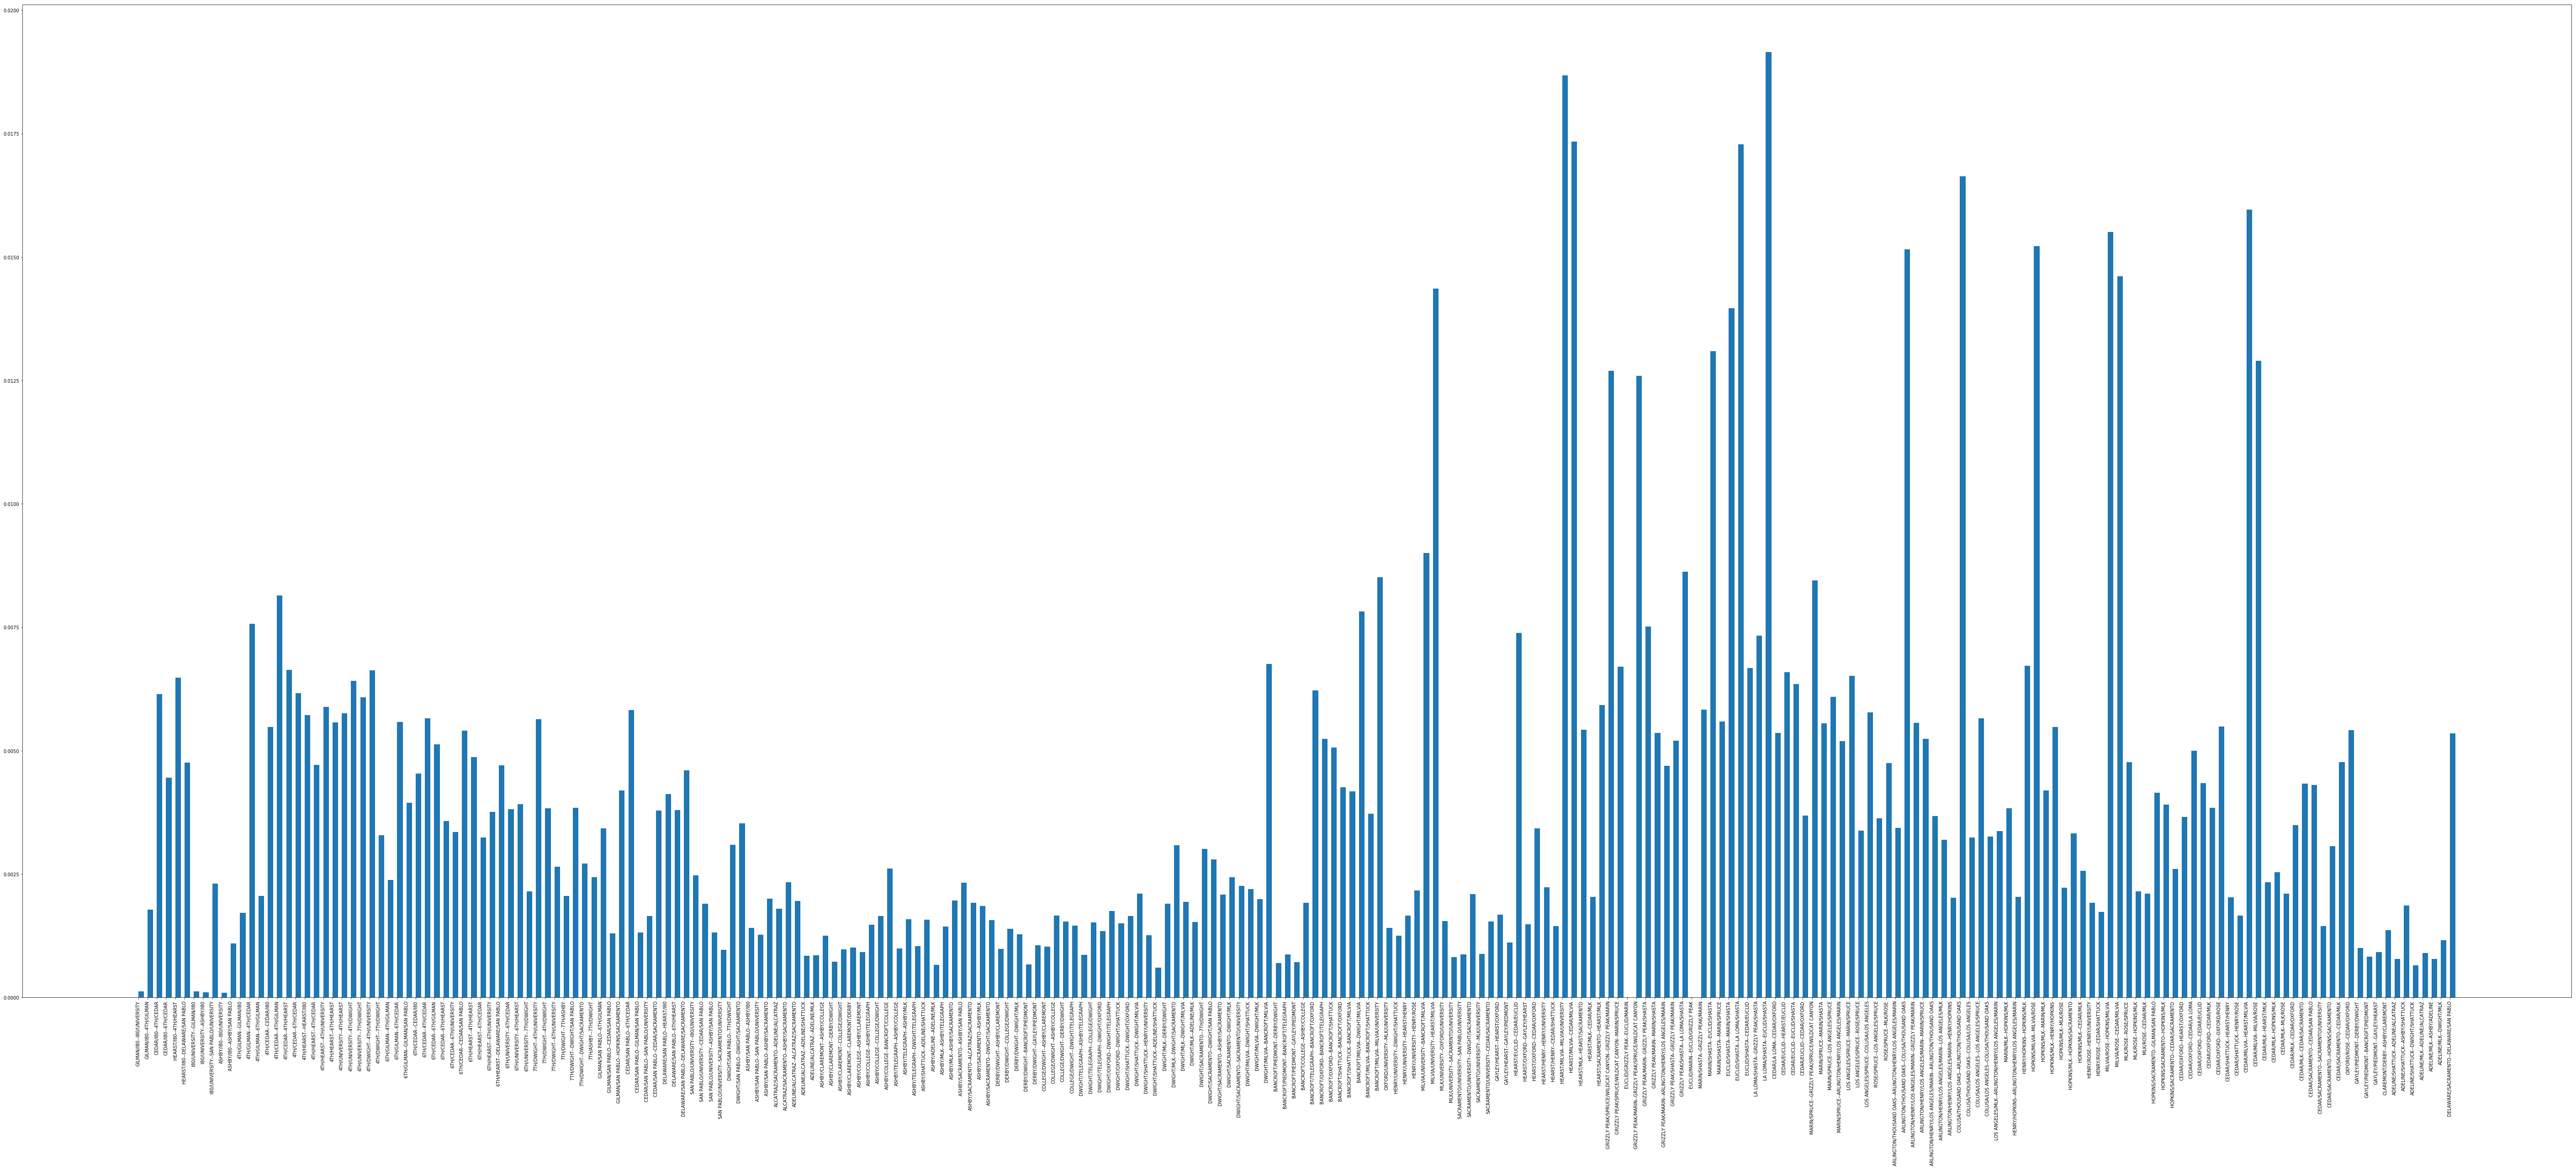

In [13]:
plt.figure(figsize=(100, 40))  # width:20, height:3
plt.bar(range(len(dictionary_graph_inverted)), dictionary_graph_inverted.values(), align='edge', width=0.6)
plt.xticks(range(len(dictionary_graph_inverted)), list(dictionary_graph_inverted.keys()), rotation='vertical')
plt.savefig("Turn Perspective Results.jpg")
plt.show()